In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# https://www.kaggle.com/competitions/titanic/overview
titanic_df = pd.read_csv('train.csv')
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
print("### 데이터 정보 확인 ###")
# RangeIndex: index의 범위: Row 개수
# object dtype은 Stirng: pandas가 numpy 기반으로 만들어졌기에, numpy의 string 타입의 길이 제한이 있어서 구분을 위해 object로 명시
# scikit learn은 null값을 허용하지 않음.
titanic_df.info()

### 데이터 정보 확인 ###
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Text(0, 0.5, 'number of data')

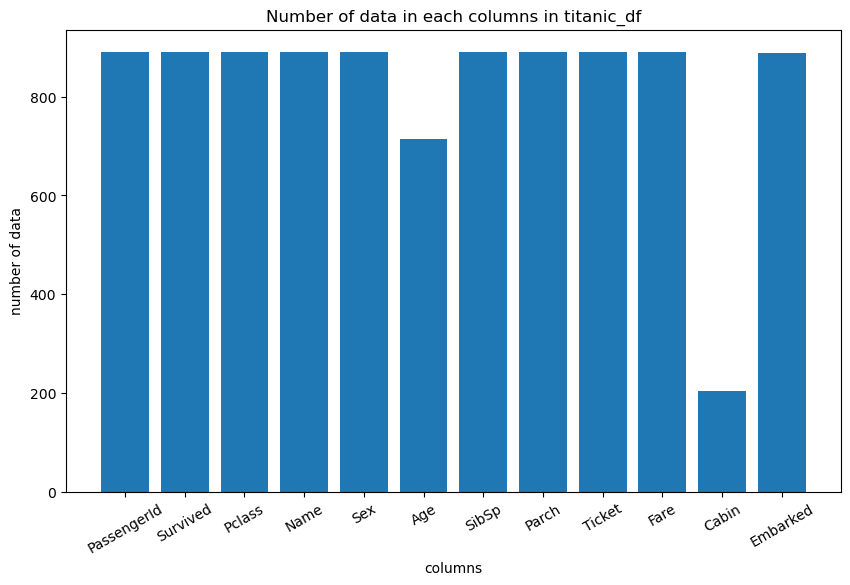

In [5]:
# 심하게 Null값이 많음
df_cnt = titanic_df.count()
plt.figure(figsize=(10,6))
plt.bar(df_cnt.index, df_cnt.values)
plt.title("Number of data in each columns in titanic_df")
plt.xlabel('columns')
plt.xticks(rotation=30)
plt.ylabel('number of data')

In [34]:
# Null 값들을 간단하게 처리하고 넘기자.
titanic_df['Age'].fillna(titanic_df['Age'].mean(), inplace=True)
titanic_df['Cabin'].fillna("N", inplace=True)
titanic_df['Embarked'].fillna("N", inplace=True)
print(f'데이터세트 Null 개수: {titanic_df.isnull().sum().sum()}')

데이터세트 Null 개수: 0


In [35]:
# Name, Ticket에서 유의미한 정보 뽑기 어려움.
titanic_df['Name'].head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

In [36]:
# 문자열 데이터 분포 확인
print(f'Sex값 분포: \n {titanic_df["Sex"].value_counts()}\n')
print(f'Cabin값 분포: \n {titanic_df["Cabin"].value_counts()}\n')
print(f'Embarked값 분포: \n {titanic_df["Embarked"].value_counts()}')

Sex값 분포: 
 Sex
male      577
female    314
Name: count, dtype: int64

Cabin값 분포: 
 Cabin
N              687
C23 C25 C27      4
G6               4
B96 B98          4
C22 C26          3
              ... 
E34              1
C7               1
C54              1
E36              1
C148             1
Name: count, Length: 148, dtype: int64

Embarked값 분포: 
 Embarked
S    644
C    168
Q     77
N      2
Name: count, dtype: int64


In [37]:
titanic_df['Cabin'] = titanic_df['Cabin'].str[:1] # 문자열 변환, 슬라이싱
titanic_df['Cabin'].head()

0    N
1    C
2    N
3    C
4    N
Name: Cabin, dtype: object

In [41]:
# 성별이 생존에 영향을 미쳤는지 확인
titanic_df.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

<Axes: xlabel='Sex', ylabel='Survived'>

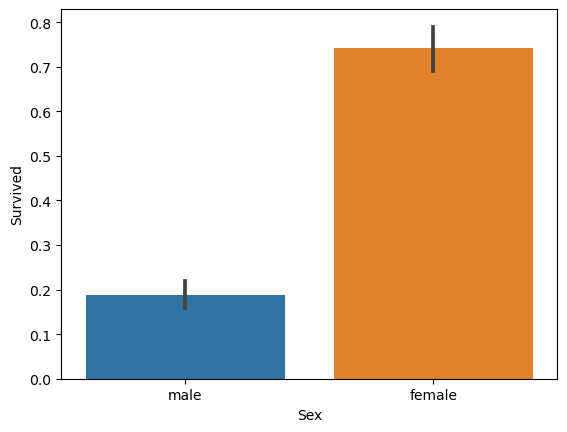

In [43]:
sns.barplot(x='Sex', y='Survived', data=titanic_df)

<Axes: xlabel='Pclass', ylabel='Survived'>

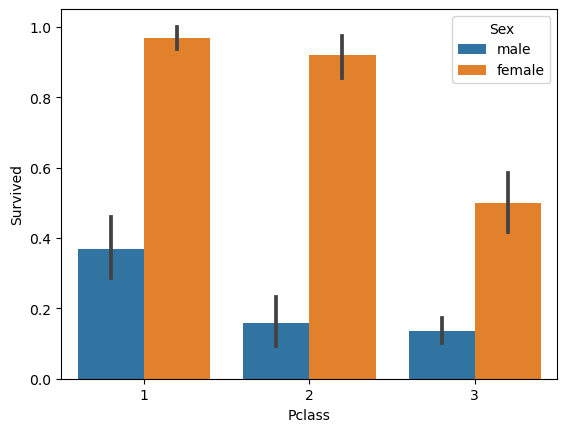

In [47]:
# 객실 등급에 따른 생존
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=titanic_df)

<Axes: xlabel='Age_cat', ylabel='Survived'>

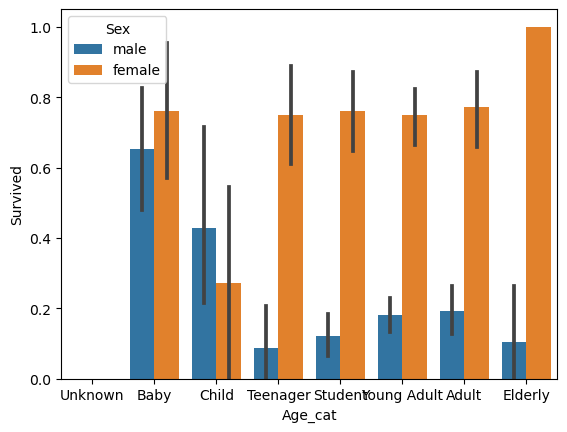

In [48]:
# 나이에 따른 생존
# 특이하게도 child들이 생존확률이 낮다. 특히 female child가 male child보다 낮은게 특이하다
def get_category_age(age):
    cat=''
    if age<=-1: cat='Unknown'
    elif age<=5: cat='Baby'
    elif age<=12: cat='Child'
    elif age<=18: cat='Teenager'
    elif age<=25: cat='Student'
    elif age<=35: cat='Young Adult'
    elif age<=60: cat='Adult'
    else: cat='Elderly'
    
    return cat

titanic_df['Age_cat'] = titanic_df['Age'].apply(lambda x:get_category_age(x))
group_name = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Elderly']
sns.barplot(x='Age_cat', y='Survived', hue='Sex', data=titanic_df, order=group_name)

In [50]:
# perform label encoding on sex, cabin, embarked.
# categorical data -> numerical data
from sklearn.preprocessing import LabelEncoder

def encode_features(df):
    features=['Sex','Cabin','Embarked']
    for feature in features:
        le = LabelEncoder()
        df[feature] = le.fit_transform(df[feature])
    return df

titanic_df = encode_features(titanic_df) 
titanic_df.drop('Age_cat', axis=1, inplace=True) # Age_cat 필요 없으니 지우기
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,7,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,7,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,7,3


## Re-build

In [51]:
# 위에 내용 계속 다시 실행하기 벅차니까, 정리한번 해두고 넘어가자

# Null 값 처리
def fillna(df):
    df['Age'].fillna(df['Age'].mean(), inplace=True)
    df['Cabin'].fillna('N', inplace=True)   
    df['Embarked'].fillna('N', inplace=True)
    return df

# 필요없어보이는 column 삭제
def drop_features(df):
    df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
    return df


def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features=['Sex','Cabin','Embarked']
    for feature in features:
        le = LabelEncoder()
        df[feature] = le.fit_transform(df[feature])
    return df

def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

In [53]:
# 다시 데이터 불러오기 + ML 준비
titanic_df = pd.read_csv('train.csv')
y = titanic_df['Survived']
X = titanic_df.drop(['Survived'], axis=1, inplace=False)
X = transform_features(X)

In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [67]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# classifier 생성
dt_clf = DecisionTreeClassifier()
rf_clf = RandomForestClassifier()
lr_clf = LogisticRegression(solver='liblinear')

# Decision Tree
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)
print(f'DecisionTreeClassifier 정확도: {accuracy_score(y_test, dt_pred):.4f}')

# Random Forest
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
print(f'RandomForestClassifier 정확도: {accuracy_score(y_test, rf_pred):.4f}')

# Logistic Regression
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
print(f'LogisticRegression 정확도: {accuracy_score(y_test, lr_pred):.4f}')

DecisionTreeClassifier 정확도: 0.8045
RandomForestClassifier 정확도: 0.8268
LogisticRegression 정확도: 0.8380


## Kfold Cross validation

In [72]:
from sklearn.model_selection import KFold

def exec_kfold(clf, folds=5):
    kfold = KFold(n_splits=folds)
    scores = []
    
    # kfold 수행
    for iter_cnt, (train_idx, test_idx) in enumerate(kfold.split(X)):
        X_train, X_test = X.values[train_idx], X.values[test_idx]
        y_train, y_test = y.values[train_idx], y.values[test_idx]
        
        # classifier
        clf.fit(X_train, y_train)
        pred = clf.predict(X_test)
        accuracy = accuracy_score(y_test, pred)
        scores.append(accuracy)
        print(f"교차 검증 {iter_cnt} 정확도: {accuracy:.4f}")

    mean_score = np.mean(scores)
    print(f"평균 정확도: {mean_score:.4f}")

print("Decision Tree 5 Fold Cross Validation:")
exec_kfold(dt_clf, folds=5)
print("\nRandom Forest 5 Fold Cross Validation:")
exec_kfold(rf_clf, folds=5)
print("\nLogistic Regression 5 Fold Cross Validation:")
exec_kfold(lr_clf, folds=5)

Decision Tree 5 Fold Cross Validation:
교차 검증 0 정확도: 0.7598
교차 검증 1 정확도: 0.7753
교차 검증 2 정확도: 0.7978
교차 검증 3 정확도: 0.7753
교차 검증 4 정확도: 0.8258
평균 정확도: 0.7868

Random Forest 5 Fold Cross Validation:
교차 검증 0 정확도: 0.7709
교차 검증 1 정확도: 0.8034
교차 검증 2 정확도: 0.8146
교차 검증 3 정확도: 0.7584
교차 검증 4 정확도: 0.8652
평균 정확도: 0.8025

Logistic Regression 5 Fold Cross Validation:
교차 검증 0 정확도: 0.7933
교차 검증 1 정확도: 0.7921
교차 검증 2 정확도: 0.7753
교차 검증 3 정확도: 0.7472
교차 검증 4 정확도: 0.8427
평균 정확도: 0.7901


In [77]:
from sklearn.model_selection import cross_val_score

def stratified_kfold(clf, cv=5):
    scores = cross_val_score(clf, X, y, cv=cv)
    for iter_cnt, accuracy in enumerate(scores):
        print(f"교차 검증 {iter_cnt} 정확도: {accuracy:.4f}")
    print(f"평균 정확도: {np.mean(scores):.4f}")
    
print("Decision Tree 5 Fold Stratified Cross Validation:")
stratified_kfold(dt_clf, cv=5)
print("\nRandom Forest 5 Fold Stratified Cross Validation:")
stratified_kfold(rf_clf, cv=5)
print("\nLogistic Regression 5 Fold Stratified Cross Validation:")
stratified_kfold(lr_clf, cv=5)

Decision Tree 5 Fold Stratified Cross Validation:
교차 검증 0 정확도: 0.7542
교차 검증 1 정확도: 0.7697
교차 검증 2 정확도: 0.8090
교차 검증 3 정확도: 0.7921
교차 검증 4 정확도: 0.8315
평균 정확도: 0.7913

Random Forest 5 Fold Stratified Cross Validation:
교차 검증 0 정확도: 0.7765
교차 검증 1 정확도: 0.7978
교차 검증 2 정확도: 0.8315
교차 검증 3 정확도: 0.7865
교차 검증 4 정확도: 0.8596
평균 정확도: 0.8104

Logistic Regression 5 Fold Stratified Cross Validation:
교차 검증 0 정확도: 0.7877
교차 검증 1 정확도: 0.7921
교차 검증 2 정확도: 0.7753
교차 검증 3 정확도: 0.7640
교차 검증 4 정확도: 0.8146
평균 정확도: 0.7868


## Grid Search

In [80]:
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

parameters_dt = {'max_depth': [2,3,5,10], 'min_samples_split': [2,3,5], 'min_samples_leaf':[1,5,8]}

grid_dclf = GridSearchCV(dt_clf, param_grid=parameters_dt, scoring='accuracy', cv=5)
grid_dclf.fit(X_train, y_train)
print(f"GridSearchCV 최적 hyperparameter: {grid_dclf.best_params_}")
print(f"GridSearchCV 최고 정확도: {grid_dclf.best_score_:.4f}")
best_dclf = grid_dclf.best_estimator_
print()

parameters_rf = {
    'n_estimators': [50, 100, 200, 500],          # 트리의 개수
    'max_depth': [None, 10, 20, 30, 40],          # 최대 깊이
    'bootstrap': [True, False]                    # 부트스트랩 샘플링 여부
}
grid_rclf = GridSearchCV(rf_clf, param_grid=parameters_rf, scoring='accuracy', cv=5)
grid_rclf.fit(X_train, y_train)
print(f"GridSearchCV 최적 hyperparameter: {grid_rclf.best_params_}")
print(f"GridSearchCV 최고 정확도: {grid_rclf.best_score_:.4f}")
best_rclf = grid_rclf.best_estimator_
print()

parameters_lr = {
    'penalty': ['l1', 'l2', 'elasticnet', None],  # 패널티 유형
    'C': [0.01, 0.1, 1, 10, 100],                # 규제 강도 (작을수록 강한 규제)
    'max_iter': [100, 200, 300],                 # 최대 반복 횟수
}
grid_lclf = GridSearchCV(lr_clf, param_grid=parameters_lr, scoring='accuracy', cv=5)
grid_lclf.fit(X_train, y_train)
print(f"GridSearchCV 최적 hyperparameter: {grid_lclf.best_params_}")
print(f"GridSearchCV 최고 정확도: {grid_lclf.best_score_:.4f}")
best_lclf = grid_lclf.best_estimator_
print()

GridSearchCV 최적 hyperparameter: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 3}
GridSearchCV 최고 정확도: 0.7991

GridSearchCV 최적 hyperparameter: {'bootstrap': True, 'max_depth': 10, 'n_estimators': 100}
GridSearchCV 최고 정확도: 0.8034

GridSearchCV 최적 hyperparameter: {'C': 10, 'max_iter': 100, 'penalty': 'l1'}
GridSearchCV 최고 정확도: 0.7922



In [105]:
# best estimator로 예측 수행

# Decision Tree
dpredictions = best_dclf.predict(X_test)
accuracy_d = accuracy_score(y_test, dpredictions)
print(f"Final Decision Tree accuracy: {accuracy_d:.4f}\n")

# Random Forest
rpredictions = best_rclf.predict(X_test)
accuracy_r = accuracy_score(y_test, rpredictions)
print(f"Final Random Forest accuracy: {accuracy_r:.4f}\n")

# Decision Tree
lpredictions = best_lclf.predict(X_test)
accuracy_l = accuracy_score(y_test, lpredictions)
print(f"Final Logistic Regression accuracy: {accuracy_l:.4f}")

Final Decision Tree accuracy: 0.8436

Final Random Forest accuracy: 0.8771

Final Logistic Regression accuracy: 0.8156


## Kaggle 제출

In [142]:
test = pd.read_csv('test.csv')
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [143]:
result = test['PassengerId']
X_ = transform_features(test)
X_.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,1,34.5,0,0,7.8292,7,1
1,3,0,47.0,1,0,7.0000,7,2
2,2,1,62.0,0,0,9.6875,7,1
3,3,1,27.0,0,0,8.6625,7,2
4,3,0,22.0,1,1,12.2875,7,2


In [144]:
pred = best_rclf.predict(X_)

In [145]:
result = list(result)
pred = list(pred)
print(len(result))
print(len(pred))

418
418


In [146]:
res_df = pd.DataFrame({'PassengerID':result,
                      'Survived':pred})
res_df.head()

,PassengerID,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [148]:
res_df.to_csv('result.csv', index=False)

### Kaggle 0.76555 마무리